In [18]:
%load_ext autoreload
%autoreload 2

import parse_data.prepare_data as prepare_data
import globals
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from plotting import plot_octagon, plot_trajectory
import parse_data.flip_rotate_trajectories as flip_rotate_trajectories
import data_extraction.get_indices as get_indices
import plotting.plot_probability_chose_wall as plot_probability_chose_wall
import data_strings
import analysis.wall_visibility_and_choice as wall_visibility_and_choice

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
drop_p_choose_high = False
drop_box_plot = False
drop_scatter_plot = False

### Plot the probability of choosing High across solo and social conditions
Drop points if there are too few trials after filtering the trials list and dropping initial trials

In [20]:
data_folder = data_strings.DATA_FOLDER
json_filenames_all_social = data_strings.JSON_FILENAMES_SOCIAL
json_filenames_all_solo = data_strings.JSON_FILENAMES_SOLO

In [21]:
if not drop_p_choose_high:
    _, trial_lists_solo = prepare_data.prepare_data(data_folder, json_filenames_all_solo, combine=False)

filepath: C:\Users\tomha\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-23-37_YansuFirstSolo.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
filepath: C:\Users\tomha\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-53-34_YansuSecondSolo.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
filepath: C:\Users\tomha\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-23-50_JerryFirstSolo.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
filepath: C:\Users\tomha\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-53-56_JerrySecondSolo.json
Data is from period before 2024-09-13 00:00:00
Running dataframe throug

In [22]:
_, trial_lists_social = prepare_data.prepare_data(data_folder, json_filenames_all_social, combine=False)
trial_lists_social = trial_lists_social

filepath: C:\Users\tomha\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
filepath: C:\Users\tomha\OneDrive\PhD\SWC\data\second_experiments_2409\240927\2024-09-27_14-25-20_SaraEmilySocial.json
Loading complete.
Preprocessing complete.
filepath: C:\Users\tomha\OneDrive\PhD\SWC\data\third_experiments_2410\241017\2024-10-17_14-28-40_ShamirAbigailSocial.json
Loading complete.
Preprocessing complete.
filepath: C:\Users\tomha\OneDrive\PhD\SWC\data\fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json
Loading complete.
Preprocessing complete.
filepath: C:\Users\tomha\OneDrive\PhD\SWC\data\fifth_experiments_241112\2024-11-12_13-31-14_KhadijaWendySocial.json
Loading complete.
Preprocessing complete.
filepath: C:\Users\tomha\OneDrive\PhD\SWC\data\sixth_experiments_241112\2024-11-12_15

In [76]:
# get the probability of choosing the wall for solo and social sessions, with cut_solo_trials trials dropped from the start of the first solo session
if not drop_p_choose_high:
    (probability_choose_high_social_array,
    probability_choose_high_solo_array,
    probability_choose_high_solo_array_first_session,
    probability_choose_high_solo_array_second_session) = plot_probability_chose_wall.get_probability_chose_high_solo_social_all_sessions_df(trial_lists_solo,
                                                                                                                                            trial_lists_social,
                                                                                                                                            wall_sep=4,
                                                                                                                                            trial_type=globals.HIGH_LOW,
                                                                                                                                            cut_solo_trials=5)  

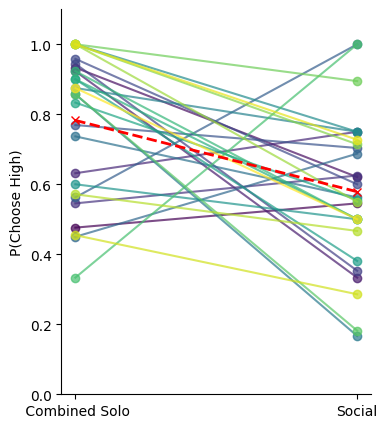

In [77]:
if not drop_p_choose_high:

    plot_probability_chose_wall.plot_probability_choose_high_solo_social(probability_choose_high_social_array, probability_choose_high_solo_array, black_lines=False)

NaN value in probabilities: [       nan 0.54545455 0.4375    ]. Dropping this point from the separated plot.
NaN value in probabilities: [  nan 0.625 0.5  ]. Dropping this point from the separated plot.
NaN value in probabilities: [       nan 0.7037037  0.76923077]. Dropping this point from the separated plot.
NaN value in probabilities: [0.45454545 1.                nan]. Dropping this point from the separated plot.
NaN value in probabilities: [   nan 0.5625 0.75  ]. Dropping this point from the separated plot.
NaN value in probabilities: [       nan 0.75       0.83333333]. Dropping this point from the separated plot.
NaN value in probabilities: [       nan 0.5        0.83333333]. Dropping this point from the separated plot.
NaN value in probabilities: [1.         0.38095238        nan]. Dropping this point from the separated plot.
NaN value in probabilities: [  nan 0.5   0.875]. Dropping this point from the separated plot.
NaN value in probabilities: [nan 0.5 1. ]. Dropping this poin

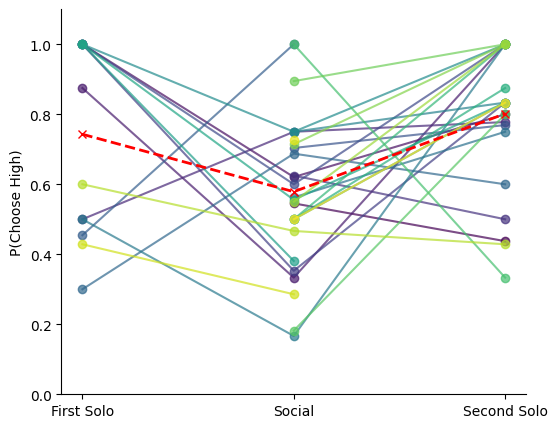

In [78]:
if not drop_p_choose_high:
    plot_probability_chose_wall.plot_probability_choose_high_solo_social(probability_choose_high_social_array, probability_choose_high_solo_array_first_session,
                                                                     probability_choose_high_solo_array_second_session, black_lines=False)

In [ ]:
if not drop_p_choose_high:

    trial_lists_filtered = []
    for trial_list in trial_lists_solo:

        trial_list = trial_list[5:]
        
        a = get_indices.get_trials_trialtype(trial_list, trial_type=globals.HIGH_LOW)
        trial_list = [trial_list[i] for i in a]

        b = get_indices.get_trials_with_wall_sep(trial_list, wall_sep=4)
        trial_list = [trial_list[i] for i in b]

        print(len(trial_list))
        trial_lists_filtered.append(trial_list)




    print(f"Sum: {sum(1 for trial_list in trial_lists_filtered if len(trial_list) <= 4)}")
    print(f"Total sum: {len(trial_lists_filtered)}")


4
16
9
5
8
5
8
9
3
8
11
6
7
15
0
13
11
4
10
10
3
16
6
13
1
6
5
6
4
6
5
4
5
6
1
8
4
7
0
6
2
5
4
5
3
5
3
5
5
7
7
3
4
4
1
6
Sum: 19
Total sum: 56


### Plot the probability of choosing the low wall across different conditions

In [85]:
if not drop_box_plot:
  (probability_first_wall_chosen_when_low_array,
    _,
    probability_first_wall_chosen_array)  = wall_visibility_and_choice.probability_first_wall_chosen_and_low_multiple_sessions_df(trial_lists_social[:12], wall_sep=4)
  (probability_first_wall_chosen_when_high_array,
    _,
    probability_first_wall_chosen_array)  = wall_visibility_and_choice.probability_first_wall_chosen_and_low_multiple_sessions_df(trial_lists_social[:12], wall_sep=4, reverse=True)

  wall_choice_probabilities = [probability_first_wall_chosen_array, probability_first_wall_chosen_when_low_array, probability_first_wall_chosen_when_high_array] 
  wall_choice_labels = ['First Wall Seen', 'First Wall Seen (Low)', 'First Wall Seen (High)']


c:\users\tomha\repos\octagon_analysis\trajectory_analysis\trajectory_vectors.py:319: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
c:\users\tomha\repos\octagon_analysis\analysis\loser_inferred_choice.py:45: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
c:\users\tomha\repos\octagon_analysis\analysis\loser_inferred_choice.py:146: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))


c:\users\tomha\repos\octagon_analysis\plotting\plot_probability_chose_wall.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  # control the positioning along the x-axis of the plotted conditions


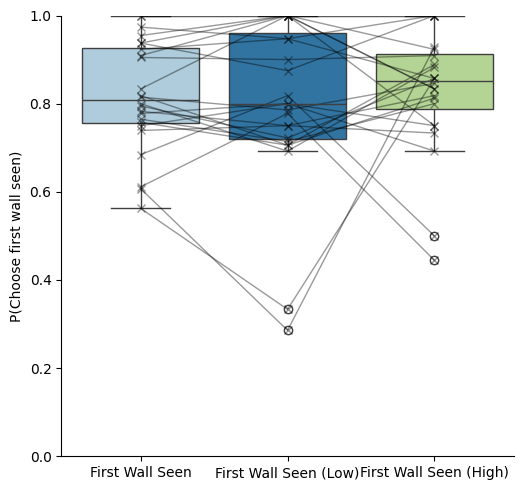

In [87]:
if not drop_box_plot:   
    plot_probability_chose_wall.boxplot_probability_choose_wall(wall_choice_probabilities, wall_choice_labels)

### Plot performance against probability of choosing Low when Low first visibile 

In [31]:
trial_lists_social_drop_5 = [trial_list for i,trial_list in enumerate(trial_lists_social) if i != 5]

c:\users\tomha\repos\octagon_analysis\trajectory_analysis\trajectory_vectors.py:319: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
c:\users\tomha\repos\octagon_analysis\analysis\loser_inferred_choice.py:45: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
c:\users\tomha\repos\octagon_analysis\analysis\loser_inferred_choice.py:146: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))


Probability low when first visible: 
 [[0.70588235 0.72222222]
 [0.84210526 0.5       ]
 [0.45833333 0.79411765]
 [0.7173913  0.63829787]
 [0.71428571 0.63157895]
 [0.58064516 0.75      ]
 [0.74418605 0.5       ]
 [0.65517241 0.55263158]
 [0.52173913 0.73333333]
 [0.41025641 0.84615385]
 [0.71111111 0.26415094]
 [0.73333333 0.41463415]
 [0.51851852 0.59375   ]
 [0.25       0.82608696]]
Proportion of scores for all sessions 
 [[0.42406312 0.57593688]
 [0.37438424 0.62561576]
 [0.42009132 0.57990868]
 [0.33567416 0.66432584]
 [0.37628866 0.62371134]
 [0.79399142 0.20600858]
 [0.492569   0.507431  ]
 [0.38533835 0.61466165]
 [0.32718894 0.67281106]
 [0.78571429 0.21428571]
 [0.24919094 0.75080906]
 [0.29604131 0.70395869]
 [0.73058252 0.26941748]
 [0.57790927 0.42209073]]
Pearson correlation coefficient is: -0.5977542740344971
P-value is: 0.02396806687943464


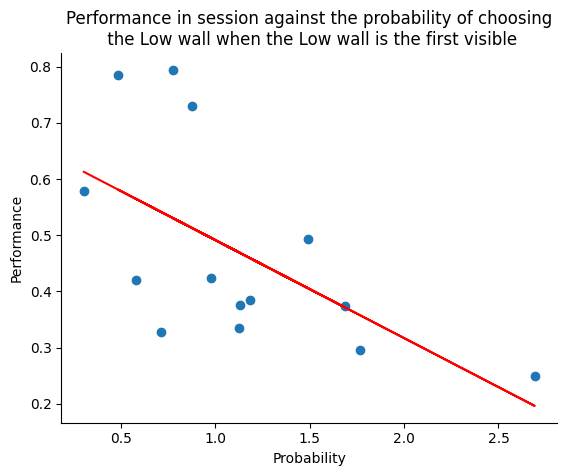

In [33]:
if not drop_scatter_plot:
    plot_probability_chose_wall.plot_performance_against_probability_low_when_first_visible_df(trial_lists_social, correlation_line=True, print_correlation=True)